In [11]:
import pandas as pd
import numpy as np
import os
import nltk
import string
import re

In [12]:
os.getcwd()

'C:\\Users\\ashok.swarna\\OneDrive - Accenture\\NLP\\Quora_Insincere_Questions'

In [13]:
df_train = pd.read_csv('train.csv',dtype=str)
df_train = df_train[:10000]
data = pd.read_csv('train.csv',dtype=str)
df_test = pd.read_csv('test.csv',dtype=str)

In [14]:
df_train.head(6)

,question_text,target
0,How did Quebec nationalists see their province...,0
1,"Do you have an adopted dog, how would you enco...",0
2,Why does velocity affect time? Does velocity a...,0
3,How did Otto von Guericke used the Magdeburg h...,0
4,Can I convert montra helicon D to a mountain b...,0
5,"Is Gaza slowly becoming Auschwitz, Dachau or T...",0


In [15]:
print ('The Train dataset has rows {} and columns {}'.format(len(df_train), (len(df_train.columns))))

The Train dataset has rows 4012 and columns 2


In [16]:
df_test.tail(6)

,qid,question_text
375800,ffff4202a8b819a470c5,How can I prepare for JEE Mains 2018 if I star...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?
375805,fffff85473f4699474b0,Climate change is a worrying topic. How much t...


In [17]:
print ('The Test dataset has rows {} and columns {}'.format(len(df_test), (len(df_test.columns))))

The Test dataset has rows 375806 and columns 2


Find the number of sincere(1) and Insincere(0) values in target variable

In [18]:
print('the target variable has {} as sincere questions and {} as insincere questions in train dataset'.
      format(len(df_train[df_train['target']==1]),
                          len(df_train[df_train['target']==0])))

the target variable has 0 as sincere questions and 0 as insincere questions in train dataset


Find Missing values

In [19]:
print("Number of null in target: {}".format(df_train['target'].isnull().sum()))
print("Number of null in question_text: {}".format(df_train['question_text'].isnull().sum()))

Number of null in target: 0
Number of null in question_text: 0


1. Pre-processing dataset

    1a. Remove punctuations

In [20]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [21]:
def remove_punctuations(text):
    text = "".join([char for char in text if char not in string.punctuation])
    return text

We can also use word_tokenize for tokenizing or TextBlob insted of apply

In [22]:
df_train['question_text_punctation_free'] = df_train['question_text'].apply(lambda x: remove_punctuations(x))

In [23]:
df_train.head(6)

,question_text,target,question_text_punctation_free
0,How did Quebec nationalists see their province...,0,How did Quebec nationalists see their province...
1,"Do you have an adopted dog, how would you enco...",0,Do you have an adopted dog how would you encou...
2,Why does velocity affect time? Does velocity a...,0,Why does velocity affect time Does velocity af...
3,How did Otto von Guericke used the Magdeburg h...,0,How did Otto von Guericke used the Magdeburg h...
4,Can I convert montra helicon D to a mountain b...,0,Can I convert montra helicon D to a mountain b...
5,"Is Gaza slowly becoming Auschwitz, Dachau or T...",0,Is Gaza slowly becoming Auschwitz Dachau or Tr...


    1b. Tokenization

In [24]:
def tokenization(text):
    text = re.split('\W+', text)
    #W+ means that either a word or character (A-Za-z0-9_) or a dash (-) can go there
    return text

converting to lowercase and tokenizing the data

In [25]:
df_train['question_Text_tokenized'] = df_train['question_text_punctation_free'].apply(lambda x: tokenization(x.lower())) 

In [26]:
df_train.head(6)

,question_text,target,question_text_punctation_free,question_Text_tokenized
0,How did Quebec nationalists see their province...,0,How did Quebec nationalists see their province...,"[how, did, quebec, nationalists, see, their, p..."
1,"Do you have an adopted dog, how would you enco...",0,Do you have an adopted dog how would you encou...,"[do, you, have, an, adopted, dog, how, would, ..."
2,Why does velocity affect time? Does velocity a...,0,Why does velocity affect time Does velocity af...,"[why, does, velocity, affect, time, does, velo..."
3,How did Otto von Guericke used the Magdeburg h...,0,How did Otto von Guericke used the Magdeburg h...,"[how, did, otto, von, guericke, used, the, mag..."
4,Can I convert montra helicon D to a mountain b...,0,Can I convert montra helicon D to a mountain b...,"[can, i, convert, montra, helicon, d, to, a, m..."
5,"Is Gaza slowly becoming Auschwitz, Dachau or T...",0,Is Gaza slowly becoming Auschwitz Dachau or Tr...,"[is, gaza, slowly, becoming, auschwitz, dachau..."


    1c. Remove stop words 

In [27]:
#get the stopwords in english from nltk

stopword = nltk.corpus.stopwords.words('english')

In [28]:
stopword

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [29]:
def stopword_removal(text):
    text = [word for word in text if word not in stopword]
    return text

In [30]:
df_train['question_Text_stop_word_removed'] = df_train['question_Text_tokenized'].apply(lambda x: stopword_removal(x))

In [31]:
df_train.head(6)

,question_text,target,question_text_punctation_free,question_Text_tokenized,question_Text_stop_word_removed
0,How did Quebec nationalists see their province...,0,How did Quebec nationalists see their province...,"[how, did, quebec, nationalists, see, their, p...","[quebec, nationalists, see, province, nation, ..."
1,"Do you have an adopted dog, how would you enco...",0,Do you have an adopted dog how would you encou...,"[do, you, have, an, adopted, dog, how, would, ...","[adopted, dog, would, encourage, people, adopt..."
2,Why does velocity affect time? Does velocity a...,0,Why does velocity affect time Does velocity af...,"[why, does, velocity, affect, time, does, velo...","[velocity, affect, time, velocity, affect, spa..."
3,How did Otto von Guericke used the Magdeburg h...,0,How did Otto von Guericke used the Magdeburg h...,"[how, did, otto, von, guericke, used, the, mag...","[otto, von, guericke, used, magdeburg, hemisph..."
4,Can I convert montra helicon D to a mountain b...,0,Can I convert montra helicon D to a mountain b...,"[can, i, convert, montra, helicon, d, to, a, m...","[convert, montra, helicon, mountain, bike, cha..."
5,"Is Gaza slowly becoming Auschwitz, Dachau or T...",0,Is Gaza slowly becoming Auschwitz Dachau or Tr...,"[is, gaza, slowly, becoming, auschwitz, dachau...","[gaza, slowly, becoming, auschwitz, dachau, tr..."


2. Processing the data

    2a. Stemming

In [32]:
ps = nltk.PorterStemmer()

In [33]:
def stemming_text(text1):
    text = [ps.stem(word) for word in text1]
    return text

In [34]:
df_train['question_Text_stemmed'] = df_train['question_Text_stop_word_removed'].apply(lambda x: stemming_text(x))

In [35]:
df_train.head(126)

,question_text,target,question_text_punctation_free,question_Text_tokenized,question_Text_stop_word_removed,question_Text_stemmed
0,How did Quebec nationalists see their province...,0,How did Quebec nationalists see their province...,"[how, did, quebec, nationalists, see, their, p...","[quebec, nationalists, see, province, nation, ...","[quebec, nationalist, see, provinc, nation, 1960]"
1,"Do you have an adopted dog, how would you enco...",0,Do you have an adopted dog how would you encou...,"[do, you, have, an, adopted, dog, how, would, ...","[adopted, dog, would, encourage, people, adopt...","[adopt, dog, would, encourag, peopl, adopt, shop]"
2,Why does velocity affect time? Does velocity a...,0,Why does velocity affect time Does velocity af...,"[why, does, velocity, affect, time, does, velo...","[velocity, affect, time, velocity, affect, spa...","[veloc, affect, time, veloc, affect, space, ge..."
3,How did Otto von Guericke used the Magdeburg h...,0,How did Otto von Guericke used the Magdeburg h...,"[how, did, otto, von, guericke, used, the, mag...","[otto, von, guericke, used, magdeburg, hemisph...","[otto, von, guerick, use, magdeburg, hemispher]"
4,Can I convert montra helicon D to a mountain b...,0,Can I convert montra helicon D to a mountain b...,"[can, i, convert, montra, helicon, d, to, a, m...","[convert, montra, helicon, mountain, bike, cha...","[convert, montra, helicon, mountain, bike, cha..."
5,"Is Gaza slowly becoming Auschwitz, Dachau or T...",0,Is Gaza slowly becoming Auschwitz Dachau or Tr...,"[is, gaza, slowly, becoming, auschwitz, dachau...","[gaza, slowly, becoming, auschwitz, dachau, tr...","[gaza, slowli, becom, auschwitz, dachau, trebl..."
6,Why does Quora automatically ban conservative ...,0,Why does Quora automatically ban conservative ...,"[why, does, quora, automatically, ban, conserv...","[quora, automatically, ban, conservative, opin...","[quora, automat, ban, conserv, opinion, report..."
7,Is it crazy if I wash or wipe my groceries off...,0,Is it crazy if I wash or wipe my groceries off...,"[is, it, crazy, if, i, wash, or, wipe, my, gro...","[crazy, wash, wipe, groceries, germs, everywhere]","[crazi, wash, wipe, groceri, germ, everywher]"
8,"Is there such a thing as dressing moderately, ...",0,Is there such a thing as dressing moderately a...,"[is, there, such, a, thing, as, dressing, mode...","[thing, dressing, moderately, different, dress...","[thing, dress, moder, differ, dress, modestli]"
9,Is it just me or have you ever been in this ph...,0,Is it just me or have you ever been in this ph...,"[is, it, just, me, or, have, you, ever, been, ...","[ever, phase, wherein, became, ignorant, peopl...","[ever, phase, wherein, becam, ignor, peopl, lo..."


In [36]:
df_train.question_Text_stemmed[184]

['best', 'institut', 'big', 'data', 'hadoop', 'cours', 'chandigarh']

In [37]:
df_train.question_Text_stop_word_removed[184]

['best', 'institute', 'big', 'data', 'hadoop', 'course', 'chandigarh']

    2b. lemmatization

In [38]:
wn =nltk.WordNetLemmatizer()

In [39]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ashok.swarna\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [40]:
def lemmatizing_text(text):
    text = [wn.lemmatize(word) for word in text ]
    return text

In [41]:
df_train['question_Text_lemmatize'] = df_train['question_Text_stemmed'].apply(lambda x: lemmatizing_text(x))


In [42]:
df_train.head(4000)

,question_text,target,question_text_punctation_free,question_Text_tokenized,question_Text_stop_word_removed,question_Text_stemmed,question_Text_lemmatize
0,How did Quebec nationalists see their province...,0,How did Quebec nationalists see their province...,"[how, did, quebec, nationalists, see, their, p...","[quebec, nationalists, see, province, nation, ...","[quebec, nationalist, see, provinc, nation, 1960]","[quebec, nationalist, see, provinc, nation, 1960]"
1,"Do you have an adopted dog, how would you enco...",0,Do you have an adopted dog how would you encou...,"[do, you, have, an, adopted, dog, how, would, ...","[adopted, dog, would, encourage, people, adopt...","[adopt, dog, would, encourag, peopl, adopt, shop]","[adopt, dog, would, encourag, peopl, adopt, shop]"
2,Why does velocity affect time? Does velocity a...,0,Why does velocity affect time Does velocity af...,"[why, does, velocity, affect, time, does, velo...","[velocity, affect, time, velocity, affect, spa...","[veloc, affect, time, veloc, affect, space, ge...","[veloc, affect, time, veloc, affect, space, ge..."
3,How did Otto von Guericke used the Magdeburg h...,0,How did Otto von Guericke used the Magdeburg h...,"[how, did, otto, von, guericke, used, the, mag...","[otto, von, guericke, used, magdeburg, hemisph...","[otto, von, guerick, use, magdeburg, hemispher]","[otto, von, guerick, use, magdeburg, hemispher]"
4,Can I convert montra helicon D to a mountain b...,0,Can I convert montra helicon D to a mountain b...,"[can, i, convert, montra, helicon, d, to, a, m...","[convert, montra, helicon, mountain, bike, cha...","[convert, montra, helicon, mountain, bike, cha...","[convert, montra, helicon, mountain, bike, cha..."
5,"Is Gaza slowly becoming Auschwitz, Dachau or T...",0,Is Gaza slowly becoming Auschwitz Dachau or Tr...,"[is, gaza, slowly, becoming, auschwitz, dachau...","[gaza, slowly, becoming, auschwitz, dachau, tr...","[gaza, slowli, becom, auschwitz, dachau, trebl...","[gaza, slowli, becom, auschwitz, dachau, trebl..."
6,Why does Quora automatically ban conservative ...,0,Why does Quora automatically ban conservative ...,"[why, does, quora, automatically, ban, conserv...","[quora, automatically, ban, conservative, opin...","[quora, automat, ban, conserv, opinion, report...","[quora, automat, ban, conserv, opinion, report..."
7,Is it crazy if I wash or wipe my groceries off...,0,Is it crazy if I wash or wipe my groceries off...,"[is, it, crazy, if, i, wash, or, wipe, my, gro...","[crazy, wash, wipe, groceries, germs, everywhere]","[crazi, wash, wipe, groceri, germ, everywher]","[crazi, wash, wipe, groceri, germ, everywher]"
8,"Is there such a thing as dressing moderately, ...",0,Is there such a thing as dressing moderately a...,"[is, there, such, a, thing, as, dressing, mode...","[thing, dressing, moderately, different, dress...","[thing, dress, moder, differ, dress, modestli]","[thing, dress, moder, differ, dress, modestli]"
9,Is it just me or have you ever been in this ph...,0,Is it just me or have you ever been in this ph...,"[is, it, just, me, or, have, you, ever, been, ...","[ever, phase, wherein, became, ignorant, peopl...","[ever, phase, wherein, becam, ignor, peopl, lo...","[ever, phase, wherein, becam, ignor, peopl, lo..."


In [43]:
#save the cleaned data
df_train.to_csv("quora_cleaned.csv", sep=',')

Vectorizing the data --- Using bag of words

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

In [45]:
x_values = df_train['question_Text_lemmatize']

In [46]:
x_values.astype(str)

0       ['quebec', 'nationalist', 'see', 'provinc', 'n...
1       ['adopt', 'dog', 'would', 'encourag', 'peopl',...
2       ['veloc', 'affect', 'time', 'veloc', 'affect',...
3       ['otto', 'von', 'guerick', 'use', 'magdeburg',...
4       ['convert', 'montra', 'helicon', 'mountain', '...
5       ['gaza', 'slowli', 'becom', 'auschwitz', 'dach...
6       ['quora', 'automat', 'ban', 'conserv', 'opinio...
7       ['crazi', 'wash', 'wipe', 'groceri', 'germ', '...
8       ['thing', 'dress', 'moder', 'differ', 'dress',...
9       ['ever', 'phase', 'wherein', 'becam', 'ignor',...
10                                       ['say', 'femin']
11                          ['calgari', 'flame', 'found']
12      ['dumbest', 'yet', 'possibl', 'true', 'explan'...
13      ['use', 'extern', 'hard', 'disk', 'o', 'well',...
14      ['30', 'live', 'home', 'boyfriend', 'would', '...
15        ['know', 'bram', 'fischer', 'rivonia', 'trial']
16      ['difficult', 'find', 'good', 'instructor', 't...
17            

In [47]:
x_values.head()

0    [quebec, nationalist, see, provinc, nation, 1960]
1    [adopt, dog, would, encourag, peopl, adopt, shop]
2    [veloc, affect, time, veloc, affect, space, ge...
3      [otto, von, guerick, use, magdeburg, hemispher]
4    [convert, montra, helicon, mountain, bike, cha...
Name: question_Text_lemmatize, dtype: object

In [48]:
count_vect = CountVectorizer(max_df=0.85,stop_words=stopword, lowercase=False)

In [49]:
count_vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=False, max_df=0.85, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [50]:
#X_counts = count_vect.fit_transform(df_train.question_Text_lemmatize, y=None)

In [51]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopword]
    return text

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(analyzer=clean_text)
X_counts = count_vect.fit_transform(data['question_text'])
print(X_counts.shape)
print(count_vect.get_feature_names())

(4012, 7030)
['', '0', '000', '0888', '0999', '1', '10', '100', '1000', '10000', '1000cc', '1080p', '10k', '10th', '11', '111', '11th', '12', '121', '1216math', '122', '12th', '13', '1370', '13yearold', '14', '145', '147', '14th', '15', '1500', '1500mph', '16', '160', '16th', '16yearold', '17', '170000', '18', '1870', '1890', '18th', '19', '1905', '1920', '1922', '1927', '1935', '1937', '1947', '1948', '19558', '1960', '1969', '1976', '1984', '1988', '1990', '1994', '19th', '1a', '1b', '1k', '1st', '2', '20', '200', '2000', '20000', '200204', '2005', '2007', '2014', '2015', '2016', '2017', '201718', '20172018', '20172019', '2018', '20181920', '2019', '2020', '2022', '2050', '21', '213', '2196', '21st', '22', '23', '230acv', '24', '2415', '242', '249', '25', '26', '280', '28777', '29', '2chan', '2d', '2e', '2gun', '2nd', '2tan', '3', '30', '300', '30000', '3006', '3050', '31', '312017', '320', '33', '336', '34', '35', '350', '3540', '35k', '36', '362436', '365', '37', '387', '39', '3d',

In [53]:
X_counts

<4012x7030 sparse matrix of type '<class 'numpy.int64'>'
	with 29139 stored elements in Compressed Sparse Row format>

In [54]:
import numpy

In [55]:
numpy.array(X_counts)

array(<4012x7030 sparse matrix of type '<class 'numpy.int64'>'
	with 29139 stored elements in Compressed Sparse Row format>, dtype=object)

In [56]:
#X_counts.astype(numpy.float32)
#X_counts.astype(numpy.float16)

In [57]:
X_counts_df = pd.DataFrame(X_counts.toarray(), columns=count_vect.get_feature_names())

In [58]:
X_counts_df.head()

,,0,000,0888,0999,1,10,100,1000,10000,...,कल,गई,ज,ठ,डक,म,ल,ॠ,ॡ,谢谢六佬
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Vectorize rawdata - Ngrams

In [59]:
data.head()

,question_text,target
0,How did Quebec nationalists see their province...,0
1,"Do you have an adopted dog, how would you enco...",0
2,Why does velocity affect time? Does velocity a...,0
3,How did Otto von Guericke used the Magdeburg h...,0
4,Can I convert montra helicon D to a mountain b...,0


In [60]:
from sklearn.feature_extraction.text import CountVectorizer

ngram_vect = CountVectorizer(ngram_range=(2,2),analyzer=clean_text) # It applies only bigram vectorizer
X_counts = ngram_vect.fit_transform(data['question_text'])
print(X_counts.shape)
print(ngram_vect.get_feature_names())

(4012, 7030)
['', '0', '000', '0888', '0999', '1', '10', '100', '1000', '10000', '1000cc', '1080p', '10k', '10th', '11', '111', '11th', '12', '121', '1216math', '122', '12th', '13', '1370', '13yearold', '14', '145', '147', '14th', '15', '1500', '1500mph', '16', '160', '16th', '16yearold', '17', '170000', '18', '1870', '1890', '18th', '19', '1905', '1920', '1922', '1927', '1935', '1937', '1947', '1948', '19558', '1960', '1969', '1976', '1984', '1988', '1990', '1994', '19th', '1a', '1b', '1k', '1st', '2', '20', '200', '2000', '20000', '200204', '2005', '2007', '2014', '2015', '2016', '2017', '201718', '20172018', '20172019', '2018', '20181920', '2019', '2020', '2022', '2050', '21', '213', '2196', '21st', '22', '23', '230acv', '24', '2415', '242', '249', '25', '26', '280', '28777', '29', '2chan', '2d', '2e', '2gun', '2nd', '2tan', '3', '30', '300', '30000', '3006', '3050', '31', '312017', '320', '33', '336', '34', '35', '350', '3540', '35k', '36', '362436', '365', '37', '387', '39', '3d',

In [61]:
X_counts_df = pd.DataFrame(X_counts.toarray(), columns=ngram_vect.get_feature_names())
X_counts_df.head(10)

,,0,000,0888,0999,1,10,100,1000,10000,...,कल,गई,ज,ठ,डक,म,ल,ॠ,ॡ,谢谢六佬
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Apply TF-IDF vectorizer

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['question_text'])
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names())

(4012, 7030)
['', '0', '000', '0888', '0999', '1', '10', '100', '1000', '10000', '1000cc', '1080p', '10k', '10th', '11', '111', '11th', '12', '121', '1216math', '122', '12th', '13', '1370', '13yearold', '14', '145', '147', '14th', '15', '1500', '1500mph', '16', '160', '16th', '16yearold', '17', '170000', '18', '1870', '1890', '18th', '19', '1905', '1920', '1922', '1927', '1935', '1937', '1947', '1948', '19558', '1960', '1969', '1976', '1984', '1988', '1990', '1994', '19th', '1a', '1b', '1k', '1st', '2', '20', '200', '2000', '20000', '200204', '2005', '2007', '2014', '2015', '2016', '2017', '201718', '20172018', '20172019', '2018', '20181920', '2019', '2020', '2022', '2050', '21', '213', '2196', '21st', '22', '23', '230acv', '24', '2415', '242', '249', '25', '26', '280', '28777', '29', '2chan', '2d', '2e', '2gun', '2nd', '2tan', '3', '30', '300', '30000', '3006', '3050', '31', '312017', '320', '33', '336', '34', '35', '350', '3540', '35k', '36', '362436', '365', '37', '387', '39', '3d',

In [63]:
X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vect.get_feature_names())
X_tfidf_df

,,0,000,0888,0999,1,10,100,1000,10000,...,कल,गई,ज,ठ,डक,म,ल,ॠ,ॡ,谢谢六佬
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
print(X_tfidf_df.loc[(X_tfidf_df!=0).any(axis=1)])

             0  000  0888  0999    1   10  100  1000  10000  ...   कल   गई  \
0     0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0   0.0    0.0  ...  0.0  0.0   
1     0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0   0.0    0.0  ...  0.0  0.0   
2     0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0   0.0    0.0  ...  0.0  0.0   
3     0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0   0.0    0.0  ...  0.0  0.0   
4     0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0   0.0    0.0  ...  0.0  0.0   
5     0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0   0.0    0.0  ...  0.0  0.0   
6     0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0   0.0    0.0  ...  0.0  0.0   
7     0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0   0.0    0.0  ...  0.0  0.0   
8     0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0   0.0    0.0  ...  0.0  0.0   
9     0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0   0.0    0.0  ...  0.0  0.0   
10    0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0   0.0    0.0  ...  0.0  0.0   
11    0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0   0.0    0.0  ...

Create feature for text message length and % of punctuation in text

In [65]:
import string

# Function to calculate length of message excluding space
data['body_len'] = data['question_text'].apply(lambda x: len(x) - x.count(" "))

data.head()

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['punct%'] = data['question_text'].apply(lambda x: count_punct(x))

data.head()

,question_text,target,body_len,punct%
0,How did Quebec nationalists see their province...,0,60,1.7
1,"Do you have an adopted dog, how would you enco...",0,66,3.0
2,Why does velocity affect time? Does velocity a...,0,58,3.4
3,How did Otto von Guericke used the Magdeburg h...,0,49,2.0
4,Can I convert montra helicon D to a mountain b...,0,63,1.6


In [66]:
#For Visualizing to check if message body length and % of punctuation is good feature or not.
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

C:\Users\ashok.swarna\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ashok.swarna\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


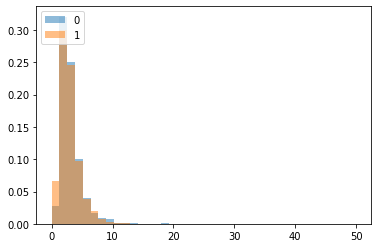

In [67]:
bins = np.linspace(0, 50, 40)

plt.hist(data[data['target']=='0']['punct%'], bins, alpha=0.5, normed=True, label=0)
plt.hist(data[data['target']=='1']['punct%'], bins, alpha=0.5, normed=True, label=1)
plt.legend(loc='upper left')
plt.show()

C:\Users\ashok.swarna\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ashok.swarna\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


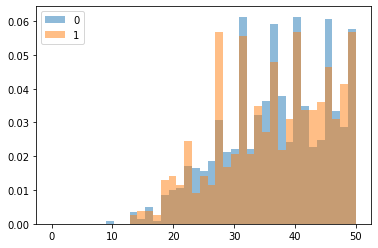

In [68]:
bins = np.linspace(0, 50, 40)

plt.hist(data[data['target']=='0']['body_len'], bins, alpha=0.5, normed=True, label=0)
plt.hist(data[data['target']=='1']['body_len'], bins, alpha=0.5, normed=True, label=1)
plt.legend(loc='upper left')
plt.show()

In [69]:
#clearly body length and punctuation is same for both so it won't help much so we avoid it

split for train and test

In [72]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopword]
    return text

In [76]:
# TF-IDF
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['question_text'])
X_tfidf_feat = pd.concat([data['body_len'], data['punct%'], data['target'], pd.DataFrame(X_tfidf.toarray())], axis=1)

In [77]:
X_tfidf_feat.head()

,body_len,punct%,target,0,1,2,3,4,5,6,...,7020,7021,7022,7023,7024,7025,7026,7027,7028,7029
0,60,1.7,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,66,3.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,58,3.4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,49,2.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,63,1.6,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
# CountVectorizer
count_vect = CountVectorizer(analyzer=clean_text)
X_count = count_vect.fit_transform(data['question_text'])
X_count_feat = pd.concat([data['body_len'], data['punct%'], data['target'], pd.DataFrame(X_count.toarray())], axis=1)

X_count_feat.head()

,body_len,punct%,target,0,1,2,3,4,5,6,...,7020,7021,7022,7023,7024,7025,7026,7027,7028,7029
0,60,1.7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,66,3.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,58,3.4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,49,2.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,63,1.6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
from sklearn.model_selection import train_test_split

In [83]:
y = X_count_feat['target']

In [84]:
X_count_feat.drop(['target'], axis =1, inplace = True)

In [85]:
#split for count vectorizer
X_trainCV, X_testCV, Y_trainCV, Y_testCV = train_test_split(X_count_feat, y, test_size = 0.20, random_state = 102)

In [86]:
#model for Count vectorizer
rf = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300],
        'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)# n_jobs=-1 for parallelizing search
gs_fit = gs.fit(X_trainCV, Y_trainCV)
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
10,23.015870,0.853312,0.255516,0.046031,None,150,"{'max_depth': None, 'n_estimators': 150}",0.805296,0.805296,0.792835,0.809969,0.809672,0.804612,0.006228,1
11,35.295271,0.725912,0.213628,0.025250,None,300,"{'max_depth': None, 'n_estimators': 300}",0.814642,0.799065,0.786604,0.805296,0.811232,0.803366,0.009922,2
7,15.533653,1.182506,0.152393,0.003857,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.799065,0.792835,0.799065,0.805296,0.804992,0.800249,0.004599,3
5,25.268783,2.001609,0.208841,0.010584,60,300,"{'max_depth': 60, 'n_estimators': 300}",0.802181,0.783489,0.781931,0.809969,0.797192,0.794952,0.010806,4
8,32.043095,1.412503,0.278255,0.025317,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.805296,0.788162,0.778816,0.802181,0.795632,0.794017,0.009612,5


In [95]:
#  from above parameters save the best
rf1 = RandomForestClassifier(n_estimators = 150, max_depth = None )
model_cv = rf1.fit(X_trainCV, Y_trainCV)

In [98]:
preds = model_cv.predict(X_testCV)

In [122]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [99]:
accuracy_score(Y_testCV,preds)

0.8019925280199253

In [101]:
precision_recall_fscore_support(Y_testCV, preds)

(array([0.79432624, 0.81052632]),
 array([0.82352941, 0.77974684]),
 array([0.80866426, 0.79483871]),
 array([408, 395], dtype=int64))

In [103]:
confusion_matrix(Y_testCV, preds)

array([[336,  72],
       [ 87, 308]], dtype=int64)

In [130]:
Y_testCV = np.array(Y_testCV)

In [131]:
# Compute ROC curve and ROC area for each class
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(Y_testCV, preds)
    roc_auc[i] = auc(fpr[i], tpr[i])

#print roc_auc_score(test, pred)
plt.figure()
plt.plot(fpr[1], tpr[1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

ValueError: Data is not binary and pos_label is not specified

In [135]:
#split for tf - idf
X_traintf, X_testtf, Y_traintf, Y_testtf = train_test_split(X_tfidf_feat, y, test_size = 0.20, random_state = 102)

In [136]:
#model for tf-idf
rf = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300],
        'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)# n_jobs=-1 for parallelizing search
gs_fit = gs.fit(X_traintf, Y_traintf)
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,12.039399,0.393148,0.574863,0.025298,60,150,"{'max_depth': 60, 'n_estimators': 150}",1.000000,0.992212,0.996885,1.000000,1.0,0.997819,0.003053,1
8,25.486833,0.746874,0.610367,0.050572,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.998442,0.993769,0.996885,0.996885,1.0,0.997195,0.002066,2
7,14.038387,0.716695,0.677987,0.097729,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.998442,0.987539,0.996885,1.000000,1.0,0.996572,0.004663,3
10,15.369128,0.660619,0.633940,0.134657,None,150,"{'max_depth': None, 'n_estimators': 150}",0.998442,0.995327,0.993769,0.993769,1.0,0.996261,0.002530,4
11,22.192019,0.371687,0.436831,0.088570,None,300,"{'max_depth': None, 'n_estimators': 300}",1.000000,0.990654,0.993769,0.996885,1.0,0.996261,0.003633,4


In [137]:
#  from above parameters save the best
rf1 = RandomForestClassifier(n_estimators = 150, max_depth = None )
model_cv = rf1.fit(X_traintf, Y_traintf)

In [139]:
predstf = model_cv.predict(X_testtf)

In [140]:
accuracy_score(Y_testCV,preds)

0.8019925280199253

In [141]:
precision_recall_fscore_support(Y_testCV, preds)

(array([0.79432624, 0.81052632]),
 array([0.82352941, 0.77974684]),
 array([0.80866426, 0.79483871]),
 array([408, 395], dtype=int64))

In [142]:
confusion_matrix(Y_testCV, preds)

array([[336,  72],
       [ 87, 308]], dtype=int64)